In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    """"smooth signal with Savitzky-Golay filter
    
    I think this fn came from chatgpt?
    """
    # Ensure window size is odd and greater than the polynomial order
    window_size = np.abs(int(window_size))
    order = np.abs(int(order))
    if window_size % 2 != 1 or window_size < 1:
        raise ValueError("window_size must be a positive odd number")
    if window_size < order + 2:
        raise ValueError("window_size is too small for the polynomial order")

    # Precompute coefficients
    half_window = (window_size - 1) // 2
    b = np.mat([[k**i for i in range(order + 1)] for k in range(-half_window, half_window + 1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)

    # Pad the signal at the extremes with values taken from the signal itself
    firstvals = y[0] - np.abs(y[1:half_window+1][::-1] - y[0])
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))

    return np.convolve(m[::-1], y, mode='valid')



C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


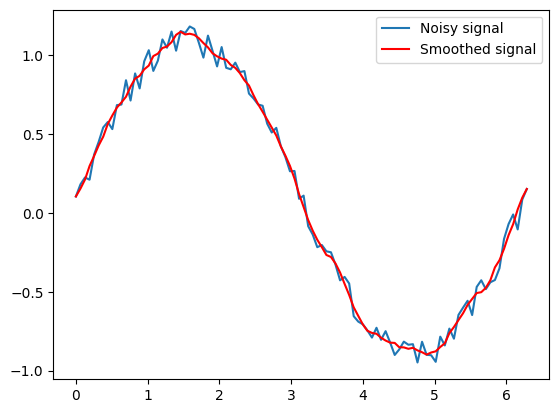

In [5]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
y_smooth = savitzky_golay(y, window_size, polyorder)

# Plot the results
plt.plot(x, y, label='Noisy signal')
plt.plot(x, y_smooth, label='Smoothed signal', color='red')
plt.legend()
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


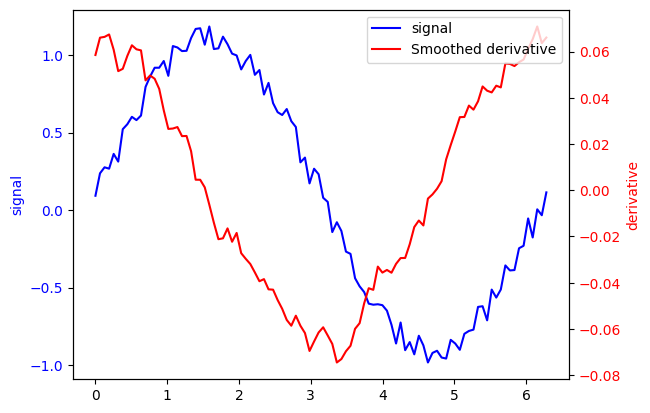

In [9]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
d1_smooth = savitzky_golay(y, window_size, polyorder, deriv=1)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(x, y, label='signal', color='blue')
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, d1_smooth, label='Smoothed derivative', color='red')
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

In [327]:
from scipy import signal
window_len = 13
polyorder=2
use='dot'
filter_d0 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=0,
    pos=window_len-1,
    use=use
)
filter_d1 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=1,
    pos=window_len-1,
    use=use
)

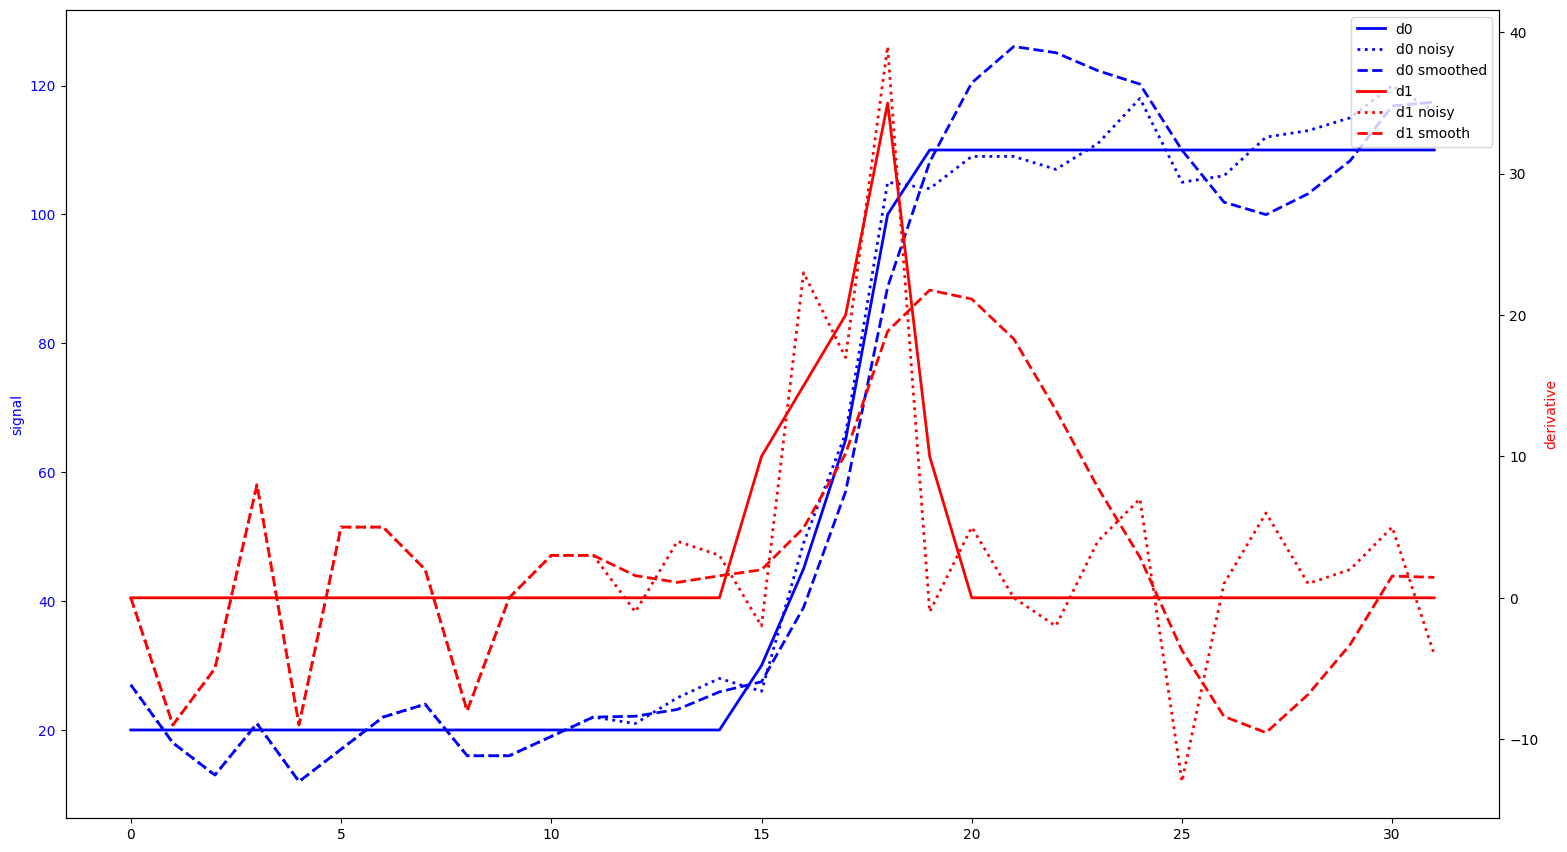

In [386]:
# x = np.linspace(0, 2 * np.pi, 100)
# y = np.sin(x) 
# y_noisy = y + np.random.random(100) * 0.2

y = np.array([20] * 15 + [30, 45, 65, 100, 110] + [110] * 12)
# y = np.array([20] * 15 + [23, 43, 63, 83, 103] + [110] * 12)
y_d1 = np.concatenate([[0], y[1:] - y[:-1]])
y_noisy = y + np.round(np.random.normal(0, 5, len(y)))
y_d1_noisy = np.concatenate([[0], y_noisy[1:] - y_noisy[:-1]])
x = [i for i in range(len(y))]

y_smooth = []
y_d1_smooth = []
for i in range(len(y_noisy)):
    if i < len(filter):
        y_smooth.append(y_noisy[i])
        y_d1_smooth.append(y_d1_noisy[i])
    else:
        y_smooth.append(np.dot(y_noisy[i-len(filter_d0)+1:i+1], filter_d0))
        y_d1_smooth.append(np.dot(y_noisy[i-len(filter_d1)+1:i+1], filter_d1))
        

# Sample data

# y_smooth = np.convolve(y, filter, mode='same')

# Create the plot
fig, ax1 = plt.subplots()
lw=2
# Plot the first line
ax1.plot(x, y, label='d0', color='blue', lw=lw)
ax1.plot(x, y_noisy, label='d0 noisy', color='blue',ls='dotted', lw=lw)
ax1.plot(x, y_smooth, label='d0 smoothed', color='blue', ls='--', lw=lw)
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y_d1, label='d1', color='red', lw=lw)
ax2.plot(x, y_d1_noisy, label='d1 noisy', color='red', ls='dotted', lw=lw)
ax2.plot(x, y_d1_smooth, label='d1 smooth', color='red', ls='--', lw=lw)
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y')#, labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.set_size_inches(18.5, 10.5)
plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

## Actual key data

In [ ]:

files = os.listdir('note logs')
files = [f for f in files if f.endswith('.txt')]
files = sorted(files)
# open latest file
file = os.path.join('note logs', files[-1])
# or open specific file
# file = r'note logs\COM12_2025_02_08.20.03.58.575.txt'
with open(file, 'r') as f:
    lines = f.readlines()
    # trim whitespace
    lines = [line.strip() for line in lines]
lines[0]

'pitch:49,noteCount:6,noteOnHammerSpeed:0.007749,noteOnVelocity:28,rawADC:531,hammerPosition:538.486877,elapsedUs:307,iteration:409040,'

In [152]:
# keys to keep
# keep all if empty
keys = [49]

strike = 0
data = []
for line in lines:
    # assumes a line looks like this:
    # key1:val1,key2:val2,...,keyN:valN,
    d = {s.split(':')[0]: s.split(':')[1] for s in line.split(',') if len(s) > 1}
    if len(keys) == 0 or int(d['pitch']) in keys:
        data.append(d)
    
df = pd.DataFrame(data)
# change all dtypes to numeric
df = df.apply(pd.to_numeric, errors='ignore')
# sort df by pitch, noteCount, and iteration
# this shouldn't be necessary, but the line order is being scambled by the vscode serial extension
# when writing serial output to file
df = df.sort_values(['pitch', 'noteCount', 'iteration']).reset_index(drop=True)

# some checks:
# check each noteCount has the same number of rows
assert df.groupby('noteCount').size().nunique() == 1
# check df is unique on pitch, noteCount, and iteration
assert all(df.groupby(['pitch', 'noteCount', 'iteration']).size() == 1)
# check that the iteration is always increasing by 1, i.e. we haven't missed any iterations
# it is very unlikely the same row count check would pass, and this one fail
it_diffs = df.groupby(['pitch', 'noteCount']).iteration.diff()
it_diffs = it_diffs.fillna(1)
assert all(it_diffs == 1)

df



,pitch,noteCount,noteOnHammerSpeed,noteOnVelocity,rawADC,hammerPosition,elapsedUs,iteration
0,49,6,0.007749,28,531,538.486877,307,409040
1,49,6,0.007749,28,530,538.736389,307,409041
2,49,6,0.007749,28,530,538.959351,306,409042
3,49,6,0.007749,28,532,539.157166,307,409043
4,49,6,0.007749,28,532,539.328613,306,409044
...,...,...,...,...,...,...,...,...
955,49,13,0.007581,28,631,632.974121,307,449234
956,49,13,0.007581,28,631,632.922363,307,449235
957,49,13,0.007581,28,631,632.844727,307,449236
958,49,13,0.007581,28,630,632.741577,306,449237


0.8333333333333334 28
0.9354838709677419 27
1.1764705882352942 30
1.35 40
0.9682539682539683 26
0.9538461538461539 25
0.9230769230769231 27
0.9402985074626866 28


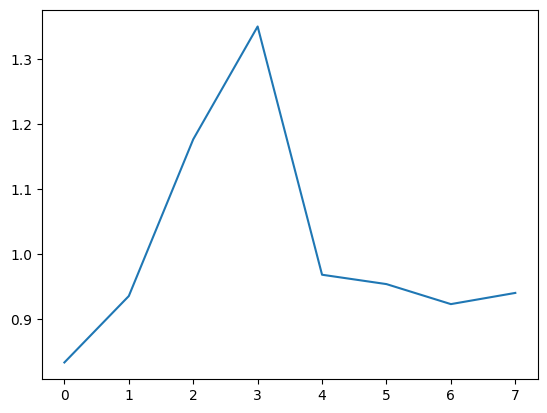

In [156]:
# various ways of generating velocity from strikes
# this could be done using key speed directly, or through simulating a hammer
# not mapping to [0, 127] at this point
def adc2v(adc_vals):
    # diffences between adjacent adc values
    diffs = np.diff(adc_vals)
    
    # find start of key press
    # i.e. ignore the start where it is not monotonically increasing
    start = len(diffs) // 2
    while diffs[start] > 0 and start > 0:
        start -= 1

    # various statistics based on key position over time
    median_diff = np.median(diffs)
    mean_diff = np.mean(diffs)
    mean_upper = np.mean([d for d in diffs if d > median_diff])
    mean_2nd_half = np.mean(diffs[len(diffs)//2:])
    # diff from the 'start' of the note - when the key started being pressed for the strike
    mean_from_start = np.mean(diffs[start:])

    return mean_from_start
new_v = []
for noteCount, dfg in df.groupby('noteCount'):
    new_v.append(adc2v1(dfg.rawADC.values))
    print(adc2v(dfg.rawADC.values), dfg.noteOnVelocity.values[0])

plt.plot(new_v)

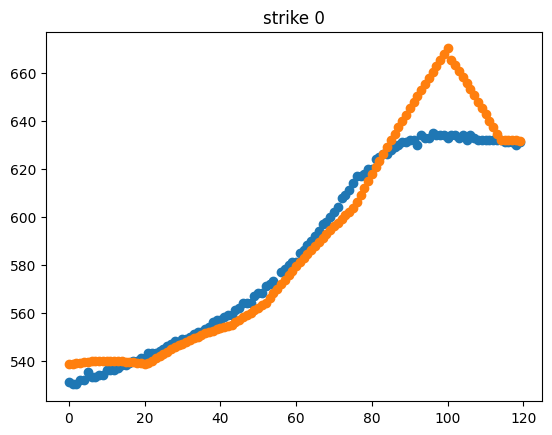

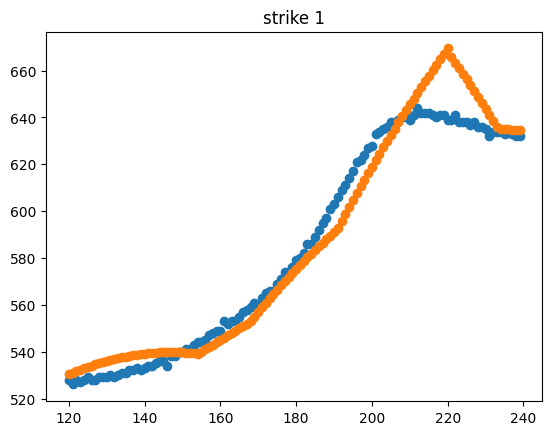

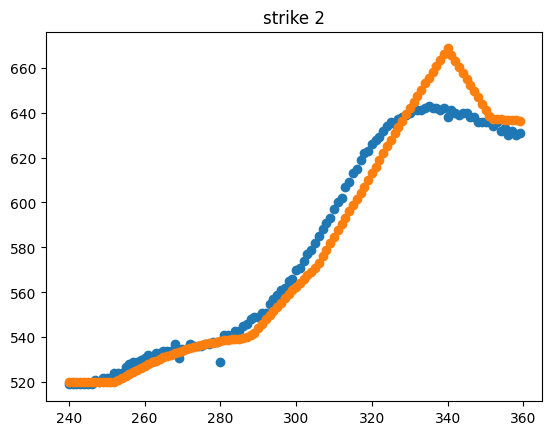

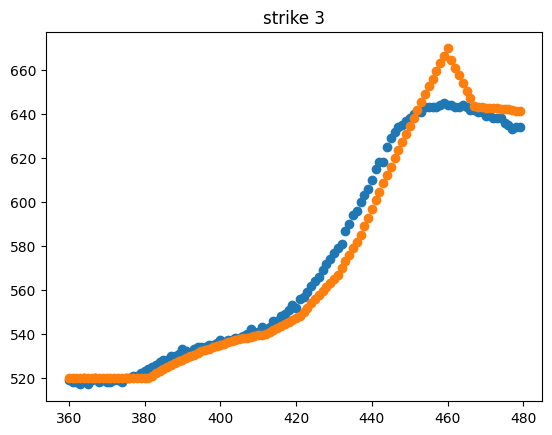

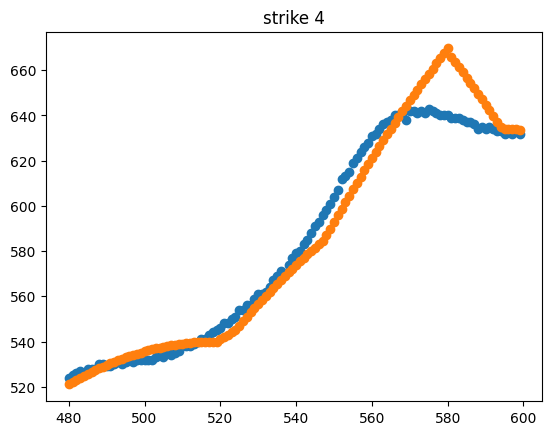

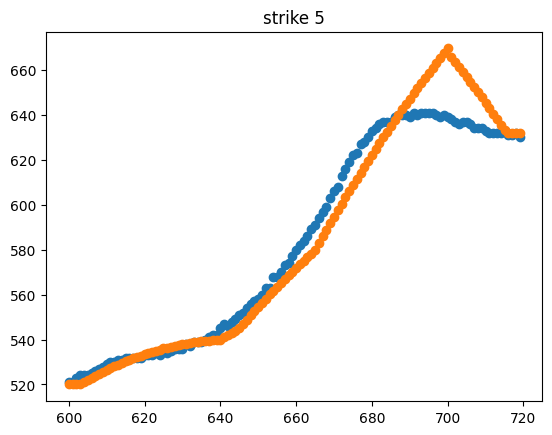

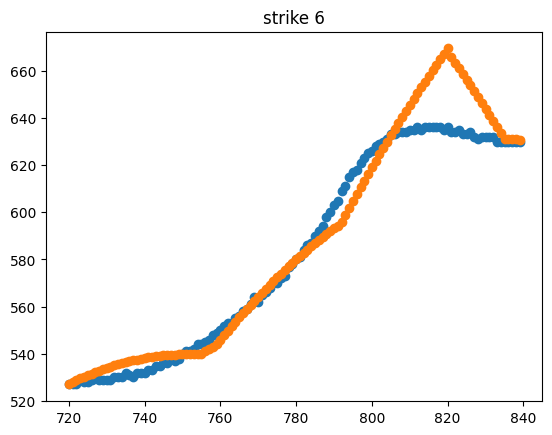

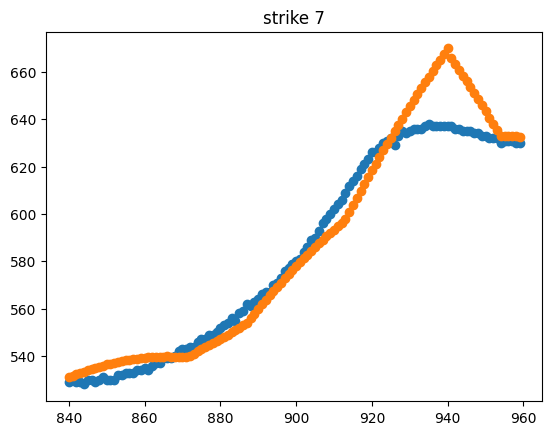

<Figure size 640x480 with 0 Axes>

In [158]:
# plot strikes
for i, (strike, dfg) in enumerate(df.groupby('noteCount')):
    plt.plot(dfg.rawADC, linestyle='', marker='o', label=f'adc')
    plt.plot(dfg.hammerPosition, linestyle='', marker='o', label=f'hammer')
    # plt.plot(dfg.elapsedUs, linestyle='', marker='o', label=f'elapsed')
    # plt.plot(dfg.iteration, linestyle='', marker='o', label=f'iteration')
    plt.title(f'strike {i}')
    # plt.ylim(min(df.rawADC), max(df.rawADC))
    plt.show()
    # reset for next plot
    plt.clf()